# 数据分析

## 文件路径

In [1]:
file_path = "/opt/downloads/tdoa_20191120092005.txt"

## 导入包

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 读取文件

In [3]:
def read_file(file_path):
    with open(file_path) as f:
        lines = [line.split() for line in f.readlines() if line.strip() != ""]
    def _line_format(x):
        if len(x) == 2:
            res = x[0].split(',')[-2:]
            res.append(".".join(x[1].split(':')))
            
            return [float(n) for n in res]
    return list(map(_line_format, lines))


## 数据清洗

In [4]:
data = read_file(file_path)

def data_flush(data):
    
    flushed_data = []
    error_data = []
    for i, item in enumerate(data):
        if item is None:
            error_data.append([0, 0, i])
        else:
            data[i][-1] = i
            flushed_data.append(data[i])
        
    flushed_data = np.array(flushed_data)
    error_data = np.array(error_data)

    return flushed_data, error_data


np_data, err_data = data_flush(data)

## 画出结果

Text(0.5, 0.92, 'data analysize total 10000 points')

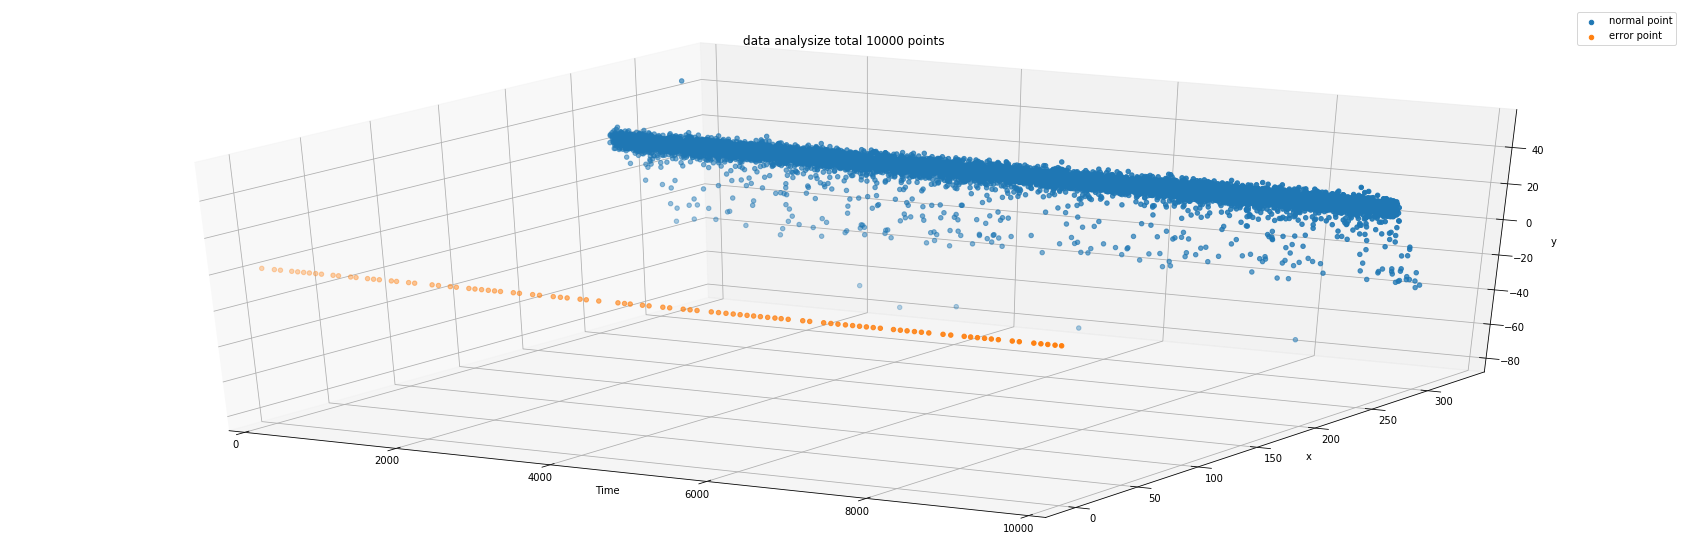

In [5]:
## 时间单位秒
seconds = 100

stop = seconds * 100

np_stop = (np_data[:, 2] < stop).sum()
err_stop = (err_data[:, 2] < stop).sum()


plt.figure(figsize=[30, 10])


ax = plt.axes(projection='3d')

ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('y')
ax.set_xlim([0, stop])
ax.scatter3D(np_data[:np_stop, 2], np_data[:np_stop, 0], np_data[:np_stop, 1], cmap='Greens', label="normal point")
ax.scatter3D(err_data[:err_stop, 2], err_data[:err_stop, 0], err_data[:err_stop, 1], cmap='Red', label="error point")

ax.legend()
plt.title(f"data analysize total {stop} points")